In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Story 1: (One-sample Two-sided t-test): Average Hours on Homework

The problem presents us with a null hypothesis that students study 10 hours on average, however the principal of the school in this story hypothesizes for the alternative hypothesis that students do not on aveage study 10 hours (or is not equal to 10 hours).

Sample Mean: 10.35
Sample Standard Deviation: 1.69
T-Statistic: 0.9238
P-Value: 0.3672
Fail to reject the null hypothesis: There is no significant difference in mean study time.

Error Analysis:
Potential Type II Error: We failed to reject H0 when it might actually be false. Estimated Beta: 0.7897

Type I Error: This occurs if we incorrectly reject the null hypothesis when the true mean is actually 10 hours.
Type II Error: This occurs if we fail to reject the null hypothesis when the true mean is actually different from 10 hours.


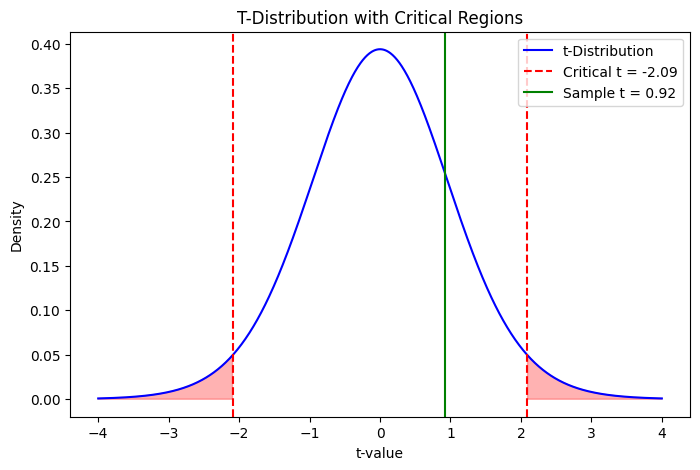

In [17]:
#Defines the dataset
data = np.array([9, 12, 10, 11, 8, 14, 9, 11, 12, 13, 8, 10, 9, 11, 10, 12, 9, 10, 8, 11])

#Hypotheses
mu_0 = 10  #Null hypothesis: mean study time is 10 hours
alpha = 0.05  #Significance level

#Calculates the sample means, standard deviation, and size of the data
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  #Sample standard deviation
n = len(data)

#Performs a two-tailed t-test
t_stat, p_value = stats.ttest_1samp(data, mu_0)

#Prints results of base calculations
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

#Decides if the hypothesis accepts or rejects the null hypothesis
reject_H0 = p_value < alpha
if reject_H0:
    print("Reject the null hypothesis: The mean study time is significantly different from 10 hours.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean study time.")

#Type 1 Error analysis
print("\nError Analysis:")
if reject_H0:
    print("Potential Type I Error: We rejected H0 when it might actually be true.")
else:
    #Estimates Type II Error probability using statistical power calculation
    effect_size = abs(sample_mean - mu_0) / sample_std
    power = stats.norm.cdf(t_stat - stats.t.ppf(1-alpha, df=n-1))  #Approximation of power
    beta = 1 - power  #Type II error probability
    print(f"Potential Type II Error: We failed to reject H0 when it might actually be false. Estimated Beta: {beta:.4f}")

#Explains each error type
print("\nType I Error: This occurs if we incorrectly reject the null hypothesis when the true mean is actually 10 hours.")
print("Type II Error: This occurs if we fail to reject the null hypothesis when the true mean is actually different from 10 hours.")

#Plots the t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=n-1)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='t-Distribution', color='blue')

#Plots and calculates the critical t-values for two-tailed test
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)
plt.axvline(-t_critical, color='red', linestyle='dashed', label=f'Critical t = {-t_critical:.2f}')
plt.axvline(t_critical, color='red', linestyle='dashed')

#Visualizes the t-statistic on the resulting plot
plt.axvline(t_stat, color='green', linestyle='solid', label=f'Sample t = {t_stat:.2f}')

#Visualizes the resulting plot
plt.fill_between(x, y, where=(x <= -t_critical) | (x >= t_critical), color='red', alpha=0.3)
plt.xlabel('t-value')
plt.ylabel('Density')
plt.title('T-Distribution with Critical Regions')
plt.legend()
plt.show()


From the above data and its result, we can conclude that since the resulting P-Value is larger than 0.05, it fails to reject the null hypothesis and proves the principals's alternate hypothesis as incorrect.  However because of this, the probability for a Type II Error increases.

In [ ]:
#Story 2: (One-sample Two-sided t-test): Average Product Weight

This story presents us with an alternative hypothesis posed by a manufacturer that the average weight of a sample of products surveyed is on average greater than 500 grams.  The null hypothesis would be that the average of the products sampled is equal to 500 grams.

Sample Mean: 509.00
Sample Standard Deviation: 12.13
T-Statistic: 2.8735
P-Value: 0.0061
Reject the null hypothesis: The mean product weight is significantly greater than 500 grams.

Error Analysis:
Potential Type I Error: We rejected H0 when it might actually be true.


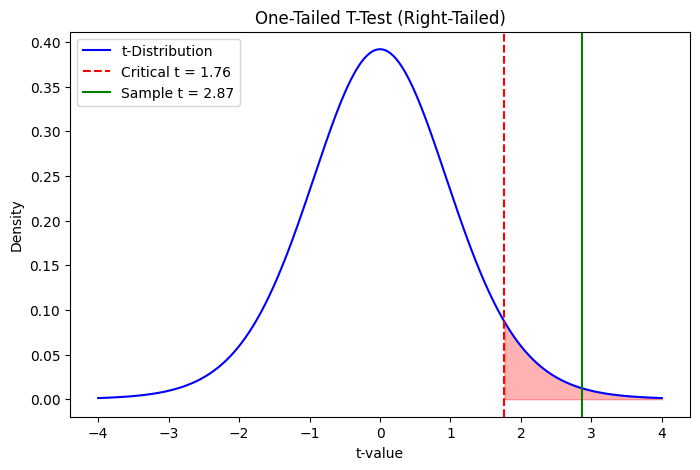

In [5]:
#Defines the dataset
data = np.array([505, 510, 490, 520, 515, 530, 495, 510, 500, 505, 525, 515, 490, 520, 505])

#Hypotheses
mu_0 = 500  #Null hypothesis: mean weight is 500 grams
alpha = 0.05  #Significance level

#Calculates the sample means, standard deviation, and size of the data
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  #Sample standard deviation
n = len(data)

#Performs a one-tailed t-test
t_stat, p_value = stats.ttest_1samp(data, mu_0, alternative='greater')

#Prints results of base calculations
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

#Decides if the hypothesis accepts or rejects the null hypothesis
reject_H0 = p_value < alpha
if reject_H0:
    print("Reject the null hypothesis: The mean product weight is significantly greater than 500 grams.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that the mean weight is greater than 500 grams.")

#Type 1 Error Analysis
print("\nError Analysis:")
if reject_H0:
    print("Potential Type I Error: We rejected H0 when it might actually be true.")
else:
    #Estimates the Type II Error probability using statistical power calculation
    effect_size = (sample_mean - mu_0) / sample_std
    power = stats.norm.cdf(t_stat - stats.t.ppf(1-alpha, df=n-1))  #Approximation of power
    beta = 1 - power  #Type II error probability
    print(f"Potential Type II Error: We failed to reject H0 when it might actually be false. Estimated Beta: {beta:.4f}")

#Plots the t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=n-1)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='t-Distribution', color='blue')

#Plots and calculates the critical t-value for one-tailed test
t_critical = stats.t.ppf(1 - alpha, df=n-1)
plt.axvline(t_critical, color='red', linestyle='dashed', label=f'Critical t = {t_critical:.2f}')

#Visualizes the t-statistic on the resulting plot
plt.axvline(t_stat, color='green', linestyle='solid', label=f'Sample t = {t_stat:.2f}')

#Fill rejection region
plt.fill_between(x, y, where=(x >= t_critical), color='red', alpha=0.3)
plt.xlabel('t-value')
plt.ylabel('Density')
plt.title('One-Tailed T-Test (Right-Tailed)')
plt.legend()
plt.show()

From this result of this data, we can deduce tha tsince the P-Value was less than 0.05, we must reject the null hypothesis.  This, however, resulted in the possibility of a Type I Error increasing because the mean product weight is greater than 500 grams.

In [6]:
#Story 3: Adjusting the Sample Size

A researcher is testing the effectiveness of a new weight-loss program. The null hypothesis
( H 0 ) is that the program has no effect on weight loss, and the alternative hypothesis ( H 1 ) is that
the program leads to weight loss. Initially, the study includes only 10 participants, and the results
fail to reject the null hypothesis.
1. Explain how increasing the sample size could affect the probability of making a Type II
error in this study.
2. Would increasing the sample size affect the probability of making a Type I error? Why or
why not?
3. If the true effect of the program is small, why might a larger sample size be particularly
important for detecting it?

1. Increasing the sample size would decrease the probability of making a Type II Error because larger sample sizes increase the ease of detecting errors which allow researchers to resolve them faster.
2. Increasing the sample size does not typically increase the probability of making a Type I Error because Type I Errors are directly tied to the significance level (alpha).  The probability of a Type I Error occurring can, however increase if the significance level is not kept constant.
3. Because with smaller sample sizes it is harder to detect errors, as mentioned in the above answers.  Broader trials produce more samples.

In [ ]:
#Story 4: Understanding the t-Distribution

A researcher is comparing the average test scores of a small group of students ( n = 6 ) to a
national average. They choose to use a t-statistic instead of a z-score for their hypothesis test.
1. Why is the t-distribution more appropriate than the standard normal distribution (z-score) in
this case?
2. How does the t-distribution adjust for the uncertainty associated with small sample sizes?
3. As the sample size increases, what happens to the shape of the t-distribution compared to
the standard normal distribution?

1. Because z-scores are most effective with sample sizes greater than 30.  In this case, the sample is six students, so it doesn't make sense to use a z-score.
2. When using the t-distribution for small sample sizes, t-tests account for this uncertainty by using an estimate of the population's standard deviation.  T-tests also will have wider and heavier tails, which allow for greater variability with the sample means.  T-distribution is also affected by the degrees of freedom, which account for greater uncertainty with the true population.
3. As mentioned in the previous answer, t-distributions will have wider, heavier tails, but in a t-distribution, the tails are also spread out more.  However, as the sample size increases, more values will be recorded, and extreme values will be less and less important, resulting in less spread out and less heavy tails.  This change would make the result look similar to that of the standard normal distribution.